<a href="https://colab.research.google.com/github/IzzatunNauly/pcvk_genap_2023/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Izza
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Izza
import cv2 
#Pemrosesan data
import os 
#mengakses fungsi2 sistem operasi
from tensorflow.keras.preprocessing.image import img_to_array
#mengubah citra menjadi aray numpy
from tensorflow.keras.models import load_model
#memuat model yang telah dilatih sebelumnya
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#melakukan praproses pada citra sebelum memasukkan ke dalam model MobileNet v2
import numpy as np
#mengimport numpy denga alias np yang digunakan pada code
from google.colab.patches import cv2_imshow
#menampilkan citra menggunakan OpenCV di lingkungan google colab

In [ ]:
# Rosis
faceCascade = cv2.CascadeClassifier("/content/gdrive/MyDrive/Mechine Learning /haarcascade_frontalface_alt2.xml")
model = load_model("/content/gdrive/MyDrive/Mechine Learning /mask_recog.h5")

In [ ]:
# Rosis
def face_mask_detector(frame):
  #frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = model.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)
  # cv2_imshow(frame)
  return frame

1/1 [==============================] - 1s 550ms/step


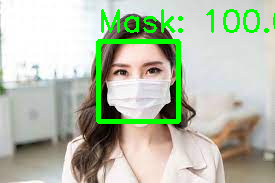

In [ ]:
# Rosis
input_image = cv2.imread("/content/gdrive/MyDrive/Mechine Learning /masker1.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

1/1 [==============================] - 0s 61ms/step


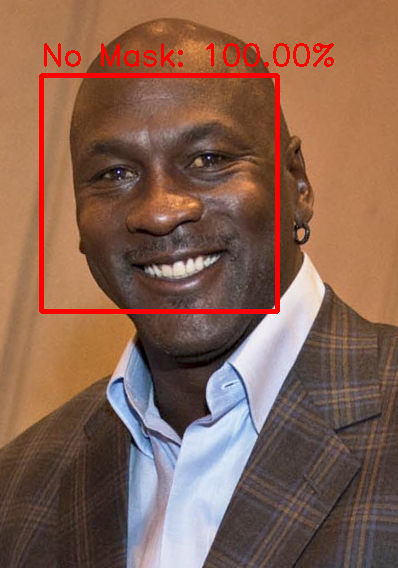

In [ ]:
# Rosis
input_image = cv2.imread("/content/gdrive/MyDrive/Mechine Learning /mjordan.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

In [ ]:
# Izza
cap = cv2.VideoCapture('/content/gdrive/MyDrive/Mechine Learning /video.mp4')
ret, frame = cap.read()
#ret adalah nilai boolean yang menunjukkan apakah pembacaan frame berhasil dilakukan atau tidak 
#frame berisi frame citra yang telah dibaca.
frame_height, frame_width, _ = frame.shape
#_=tidak digunakan dalam kode ini dan hanya untuk mengabaikan saluran warna (channel) pada frame
out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
#Memulai loop while untuk membaca dan memproses setiap frame dalam video.
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = face_mask_detector(frame)
#Memanggil fungsi face_mask_detector() dengan menggunakan frame sebagai argumen untuk mendeteksi masker wajah pada frame tersebut
  out.write(output)
#Menulis frame hasil deteksi pada objek out menggunakan metode write(). 
#output merupakan frame hasil deteksi yang akan ditambahkan ke dalam video output.
out.release()
#Menghentikan penulisan frame pada objek out dan menyimpan video output.
print("Done processing video")

Processing Video...
1/1 [==============================] - 0s 38ms/step
Done processing video
